In [1]:
import pandas as pd
import numpy as np

In [7]:
df_holi = pd.read_csv('holidays_events.csv')
df_oil = pd.read_csv('oil.csv')
df_stores = pd.read_csv('stores.csv')
df_trans = pd.read_csv('transactions.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [8]:
df_train.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0


In [9]:
df_holi.head(2)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


In [15]:
df_oil.head(2)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14


In [18]:
df_stores.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [20]:
df_trans.head(2)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111


In [26]:
df_train1=df_train.merge(df_holi,on='date',how='left')
df_train1=df_train1.merge(df_oil,on='date',how='left')
df_train1=df_train1.merge(df_stores,on='store_nbr',how='left')
df_train1=df_train1.merge(df_trans,on=['date','store_nbr'],how='left')
df_train1=df_train1.rename(columns={'type_x':'Holiday','type_y':'store_type'})
df_train1.head(2)

,id,date,store_nbr,family,sales,onpromotion,Holiday,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


In [29]:
df_train1['date']=pd.to_datetime(df_train1['date'])

In [33]:
df_train1['year']=df_train1['date'].dt.year
df_train1['month']=df_train1['date'].dt.month
import calendar
df_train1['week']=df_train1['date'].dt.isocalendar().week
df_train1['quarter']=df_train1['date'].dt.quarter
df_train1['day_name']=df_train1['date'].dt.day_name()
df_train1.head(2)

,id,date,store_nbr,family,sales,onpromotion,Holiday,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday


In [59]:
#Average store sales
df_store_sales=df_train1.groupby('store_type').agg({
    "sales" : "mean"}).reset_index().sort_values(by='sales',ascending='False')
#Average family sales
df_fam_sales=df_train1.groupby('family').agg({
    'sales':'mean'}).reset_index().sort_values(by='sales',ascending=False)

In [60]:
df_store_sales

,store_type,sales
2,C,197.790647
4,E,270.285490
1,B,328.275233
3,D,352.084510
0,A,708.378165


In [61]:
df_fam_sales.head(5)

,family,sales
12,GROCERY I,3790.432797
3,BEVERAGES,2394.912701
30,PRODUCE,1355.373698
7,CLEANING,1074.171518
8,DAIRY,711.175991


In [97]:
df_2013=df_train1[df_train1['year']==2013][['month','sales']]
df_2013=df_2013.groupby('month').agg({
    'sales':'mean'}).reset_index().rename(columns={'sales':'s13'})
df_2014=df_train1[df_train1['year']==2014][['month','sales']]
df_2014=df_2014.groupby('month').agg({
    'sales':'mean'}).reset_index().rename(columns={'sales':'s14'})
df_2015=df_train1[df_train1['year']==2015][['month','sales']]
df_2015=df_2015.groupby('month').agg({
    'sales':'mean'}).reset_index().rename(columns={'sales':'s15'})
df_2016=df_train1[df_train1['year']==2016][['month','sales']]
df_2016=df_2016.groupby('month').agg({
    'sales':'mean'}).reset_index().rename(columns={'sales':'s16'})
df_2017=df_train1[df_train1['year']==2017][['month','sales']]
df_2017=df_2017.groupby('month').agg({
    'sales':'mean'}).reset_index().rename(columns={'sales':'s17'})

In [98]:
df_2017

,month,s17
0,1,476.596791
1,2,465.971468
2,3,483.400632
3,4,482.172948
4,5,487.162797
5,6,488.707278
6,7,489.909880
7,8,465.144891


In [99]:
df_2017_no=pd.DataFrame({'month':[9,10,11,12],'s17':[0,0,0,0]})
df_2017=df_2017.append(df_2017_no)#.rename(columns={'sales':'s17'})
df_2017

,month,s17
0,1,476.596791
1,2,465.971468
2,3,483.400632
3,4,482.172948
4,5,487.162797
5,6,488.707278
6,7,489.909880
7,8,465.144891
0,9,0.000000
1,10,0.000000


In [102]:
df_year=df_2013.merge(df_2014,on='month').merge(df_2015,on='month').merge(df_2016,on='month').merge(df_2017,on='month')

In [120]:
df_month_sale=df_train1.groupby('month').agg({'sales':'mean'}).reset_index()
df_month_sale['sales']=round(df_month_sale['sales'],2)

In [121]:
df_month_sale.head(2)

,month,sales
0,1,341.92
1,2,320.93


In [122]:
df_month_sale['month_text']=df_month_sale['month'].apply(
    lambda x:calendar.month_abbr[x])

In [124]:
df_week_sale=df_train1.groupby('week').agg({'sales':'mean'}).reset_index()
df_quarter_sale=df_train1.groupby('quarter').agg({'sales':'mean'}).reset_index()

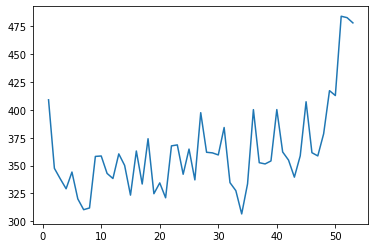

In [134]:
import matplotlib.pyplot as plt
plt.plot(df_week_sale.week,df_week_sale.sales)

In [136]:
df_day_sale=df_train1.groupby('day_name').agg({'sales':'mean'}).reset_index()
df_day_sale['sales']=round(df_day_sale['sales'],2)

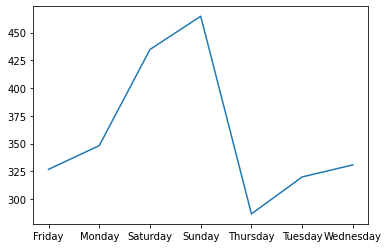

In [137]:
plt.plot(df_day_sale['day_name'],df_day_sale['sales'])

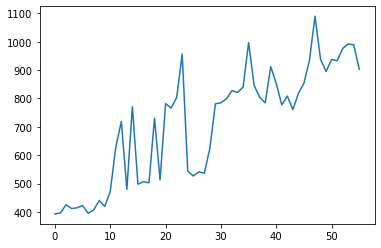

In [155]:
df_year_month_stype=df_train1.groupby(
    ['year','month','store_type']).agg({'sales':'mean'}).reset_index()
df_A_store=df_year_month_stype[df_year_month_stype['store_type']=='A'].reset_index().drop(columns='index')
plt.plot(df_A_store['sales'])

In [159]:
df_A_store[df_A_store.month==1].reset_index().drop(columns='index')

,year,month,store_type,sales
0,2013,1,A,392.852082
1,2014,1,A,718.514428
2,2015,1,A,543.957626
3,2016,1,A,846.384022
4,2017,1,A,938.637214
